# Reducción de la dimensionalidad con t-SNE

T-distributed Stochastic Neighbor Embedding (t-SNE) es un método estadístico no lineal para la reducción de la dimensionalidad

In [1]:
import numpy as np
from sklearn.manifold import TSNE

In [2]:
from pandas import read_csv
data = read_csv('snd-dataset-from-plain-json.csv')
data.head()

,Duration,Loudness,LogAttackTime,Tempo,Tempo.confidence,TemporalCentroid,SingleEvent,Loop,Tonality,Tonality.confidence,DynamicRange,Note.midi,Note.frequency,Note.confidence,Genre,Mood
0,24.218412,-16.581459,0.769376,95,0.133154,0.498596,False,False,G major,0.524679,9.689243,55,197.972900,0.000000,Genre B,Mood B
1,243.983673,-16.891335,1.618665,65,0.545527,0.479576,False,False,G major,0.785114,5.247044,40,85.456451,0.000000,Genre A,Mood A
2,15.281632,-21.658251,0.582658,63,0.996905,0.492315,True,True,C minor,0.698095,1.060242,50,151.972198,0.352345,Genre B,Mood B
3,2.000000,-10.525232,-1.590209,119,0.000000,0.468918,False,False,G# minor,0.646680,0.000000,41,91.402817,0.000000,Genre A,Mood A
4,1.454150,-28.335722,-0.492548,152,0.000000,0.502481,True,False,F# minor,0.408481,0.000000,107,3984.657227,0.695633,Genre A,Mood A


In [3]:
# Descarto columnas que no se van a usar por ahora
# Tip: axis value ('0' for rows, and '1' for columns)
data = data.drop("Tempo.confidence", axis=1);
data = data.drop("Tonality.confidence", axis=1);
data = data.drop("Note.confidence", axis=1);
data = data.drop("Loop", axis=1);
data = data.drop("SingleEvent", axis=1);

#key_to_number_list = ['A minor', 'A major', 'A# minor', 'A# major', 'B minor', 'B major', 'C minor', 'C major', 'C# minor', 'C# major', 'D minor', 'D major', 'D# minor', 'D# major','E minor', 'E major', 'F minor', 'F major', 'F# minor', 'F# major', 'G minor', 'G major','G# minor', 'G# major']
#def keyToNumber(x_value):
#    return [i for i,x in enumerate(key_to_number_list) if x == x_value][0]# Mapeo de las tonalidades 'en texto' a categorias numéricas
#data['Tonality'] = data['Tonality'].map(keyToNumber)
data = data.drop("Tonality", axis=1);

data = data.drop("Genre", axis=1);
data = data.drop("Mood", axis=1);
# Mapeo de Género y Mood a 0/1
#data['Genre'] = data['Genre'].map(lambda x: 1 if x=='Genre A' else 0)
#data['Mood'] = data['Mood'].map(lambda x: 1 if x=='Mood A' else 0)

# Diagrama en 2 dimensiones

In [4]:
X_embedded = TSNE(n_components=2).fit_transform(data)
X_embedded.shape

(1017, 2)

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 't-sne: Representación de la proyección de los datos en 2 dimensiones')

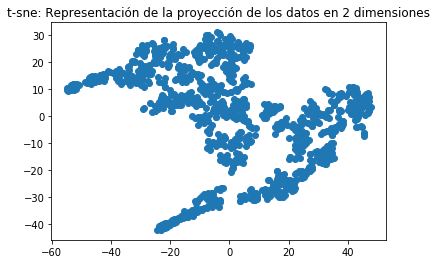

In [10]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title("t-sne: Representación de la proyección de los datos en 2 dimensiones")

## Conclusión parcial

![pca 2 dimensiones](img/pca-2dim.png)
![tsne 2 dimensiones](img/tsne-2dim.png)

Con t-sne (probabilístico), se observa una distribución más detallada con respecto a la obtenida por la proyección de PCA sobre 2 dimensiones (puramente matemático, pero sirve para predecir)

Referencia: [3 - Reducción de la dimensionalidad SVD y PCA](3%20-%20Reducción%20de%20la%20dimensionalidad%20SVD%20y%20PCA.ipynb)


# Diagrama en 3 dimensiones

In [7]:
# 3 dimensiones
projected = TSNE(n_components=3).fit_transform(data)
projected.shape

(1017, 3)

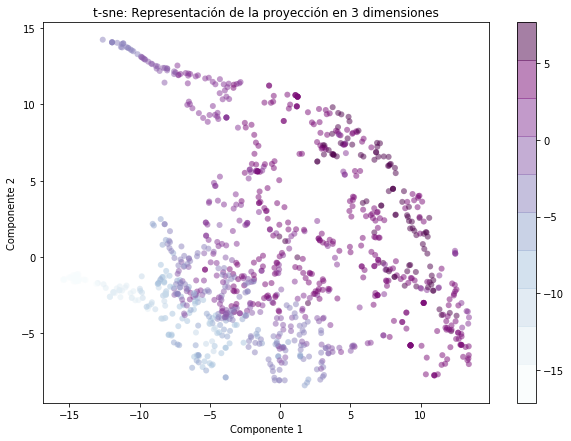

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=projected[:, 2], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu', 10))
plt.title("t-sne: Representación de la proyección en 3 dimensiones")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();

## Conclusión parcial

![pca 3 dimensiones](img/pca-3dim.png)
![tsne 3 dimensiones](img/tsne-3dim.png)

Con la proyección en 3 dimensiones, además de visualizar valores en XY, se agrega la intensidad en el eje z.

Con t-sne (probabilístico), se observa una distribución más detallada con respecto a la obtenida por la proyección de PCA sobre 2 dimensiones (puramente matemático, pero sirve para predecir)

Referencia: [6 - Particionamiento del dataset](6%20-%20Particionamiento%20del%20dataset.ipynb0)